#### Importing Dependencies

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics

#### Importing the models

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#### Data Collection

In [103]:
# Loading the dataset into a pandas dataframe
heart_dataset = pd.read_csv("heart.csv")

In [104]:
# Getting the first five rows of the dataset
heart_dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [105]:
# Getting the number of rows and columns of the dataset
heart_dataset.shape

(1025, 14)

In [106]:
# Getting some basic info about the dataset
heart_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [107]:
# Checking for missing values
heart_dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Data Analysis and Visualization

In [108]:
# Statistical measures of the dataset
heart_dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [109]:
# Getting the number of heart-diseased and free patients
heart_dataset["target"].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [110]:
# Grouping the dataset based on target
heart_dataset.groupby("target").mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


In [111]:
# Checking for class inbalance
heart_dataset["target"].value_counts(normalize=True)

target
1    0.513171
0    0.486829
Name: proportion, dtype: float64

##### 1. How does age relate to the likelihood of having heart disease?

In [112]:
# Getting the average age
print(f"Highest age: {heart_dataset["age"].max()}")
print(f"Lowest age: {heart_dataset["age"].min()}")
print(f"Average age: {heart_dataset["age"].mean()}")

Highest age: 77
Lowest age: 29
Average age: 54.43414634146342


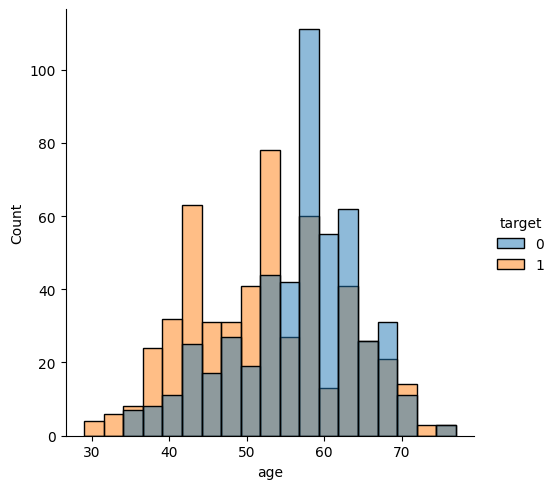

In [113]:
# Age distribution
sns.displot(x="age", data=heart_dataset, hue="target")
# plt.figsave("Age distribution.jpg", format="jpeg", dpi=300)
plt.show()

##### 2. What is the distribution of diseased and non-diseased patients?

In [114]:
# Pie chart showing the number of disease and non-disease patients
target_count = heart_dataset["target"].value_counts().reset_index()

# Renaming the columns
target_count.columns = ["target", "count"]

# Converting the target column values to text for more understanding
target_count["target"] = target_count["target"].map({1: "Heart disease", 0: "No heart disease"})

# Constructing the pie chart
px.pie(target_count, values="count", names="target", title="Pie chart showing the number of disease and non-disease patients")

In [115]:
# Checking the number of fasting blood sugar
heart_dataset["fbs"].value_counts()

fbs
0    872
1    153
Name: count, dtype: int64

##### 3. How many male and female patients with and without heart disease?

In [116]:
# Getting the number of males and females
heart_dataset["sex"].value_counts()

sex
1    713
0    312
Name: count, dtype: int64

In [117]:
# Getting the number of diseased and non-diseased patients based on gender
gender_dist = heart_dataset[["target", "sex"]].value_counts().reset_index()
gender_dist

,target,sex,count
0,0,1,413
1,1,1,300
2,1,0,226
3,0,0,86


In [118]:
# Multiple bar chart illustrating the rate of diseased and non-diseased patients based on gender

# Renaming the columns
gender_dist.columns = ["target", "sex", "count"]

# Converting the numerical values to texts
gender_dist["target"] = gender_dist["target"].map({0: "No disease", 1: "Disease"})
gender_dist["sex"] = gender_dist["sex"].map({1: "Male", 0: "Female"})

# Constructing the multiple bar chart
px.bar(gender_dist, x="sex", y="count", color="target", title="Bar chart illustrating the rate of diseased and non-diseased patients based on gender", labels={"count": "Patients", "sex": "Gender"}, barmode="group")

##### 4. What is the distribution of cholesterol among those with and without heart disease?

In [119]:
# Getting the average cholesterol level
print(f"Average cholesterol level: {heart_dataset["chol"].mean()}")

Average cholesterol level: 246.0


In [120]:
# Getting the number of diseased and non-diseased patients based on cholesterol level
heart_dataset.groupby("target")["chol"].mean()

target
0    251.292585
1    240.979087
Name: chol, dtype: float64

In [121]:
# Box plot illustrating the distribution of cholesterol level 
px.box(heart_dataset, x="target", y="chol", color="target", title="Box plot illustrating the distribution of cholesterol level")

##### 5. How is chest pain type (cp) distributed among patients?

In [122]:
# Getting the number of chest pain type
chest_type = heart_dataset["cp"].value_counts().reset_index()
chest_type.columns = ["cp", "count"]
chest_type

,cp,count
0,0,497
1,2,284
2,1,167
3,3,77


In [123]:
# Bar chart illustrating chest pain type
fig = px.bar(chest_type, x="cp", y="count", color="cp", title="Chest pain types")
fig.update_layout(title={'x': 0.5})
fig.show()

##### 6. Pair Plot (All features vs each other)

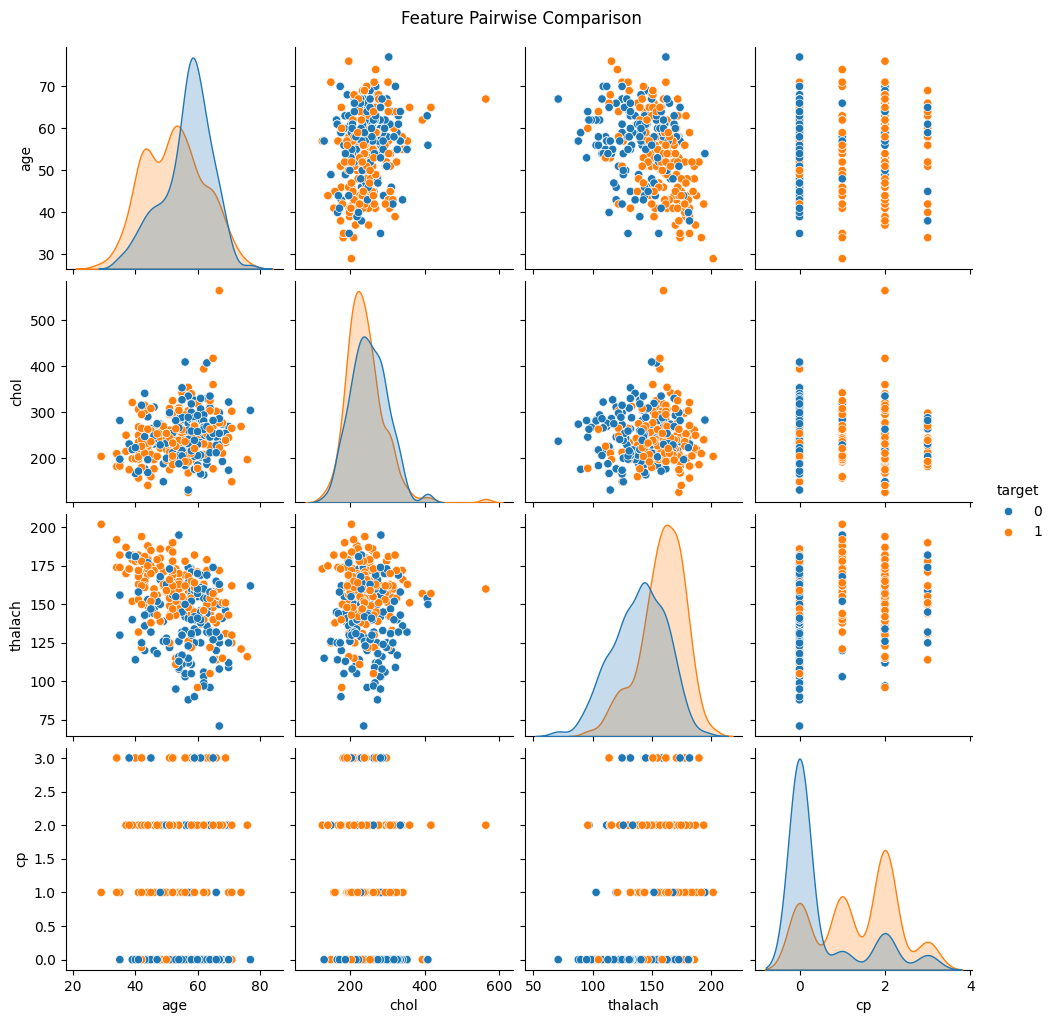

In [124]:
# Pair Plot (All features vs each other)
selected = heart_dataset[['age', 'chol', 'thalach', 'cp', 'target']]
sns.pairplot(selected, hue='target')
plt.suptitle('Feature Pairwise Comparison', y=1.02)
plt.savefig("Pair plot.jpg", format="jpeg", dpi=300)
plt.show()

##### 7. How does exercise-induced angina (exang) affect the chance of heart disease?

In [125]:
# Checking the rate of exercise-induced angina
heart_dataset["exang"].value_counts()

exang
0    680
1    345
Name: count, dtype: int64

In [126]:
# Grouping the rate of exercise-induced angina
exang_rate = heart_dataset[["exang", "target"]].value_counts().reset_index()
exang_rate

,exang,target,count
0,0,1,455
1,1,0,274
2,0,0,225
3,1,1,71


In [127]:
# Converting numerical columns to texts
heart_dataset["exang"] = heart_dataset["exang"].map({1: "Yes", 0: "No"})
heart_dataset["target"] = heart_dataset["target"].map({1: "Presence of disease", 0: "Absence of disease"})

# Constructing the bar chart
px.histogram(heart_dataset, x="exang", color="target", barmode="group", title="Heart Disease by Exercise-Induced Angina")

##### 8. Which features have the strongest correlation with heart disease?

In [128]:
# Re-convert the text to numbers
heart_dataset["exang"] = heart_dataset["exang"].map({"Yes": 1, "No": 0})
heart_dataset["target"] = heart_dataset["target"].map({"Presence of disease": 1, "Absence of disease": 0})

# Define correlation
corr_matrix = heart_dataset.corr(numeric_only=True)
# corr_matrix = corr_matrix["target"].sort_values(ascending=False)

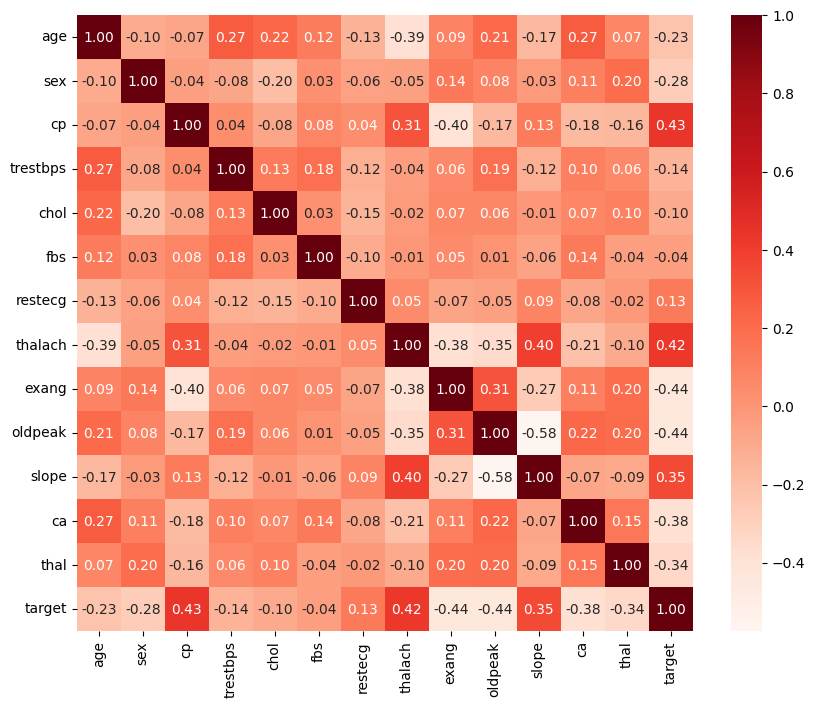

In [129]:
# Constructing the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cbar=True, annot=True, square=True, fmt=".2f", cmap="Reds")
plt.savefig("Heatmap.jpg", format="jpeg", dpi=300)
plt.show()


#### Train-Test Split

In [130]:
# Separating the data into features and target
X = heart_dataset.drop(columns="target", axis=1)
Y = heart_dataset["target"]

In [131]:
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [132]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


In [133]:
# Checking for class imbalance
Y.value_counts(normalize=True)

target
1    0.513171
0    0.486829
Name: proportion, dtype: float64

In [134]:
# Data Standardization
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X)

[[-0.26843658  0.66150409 -0.91575542 ...  0.99543334  1.20922066
   1.08985168]
 [-0.15815703  0.66150409 -0.91575542 ... -2.24367514 -0.73197147
   1.08985168]
 [ 1.71659547  0.66150409 -0.91575542 ... -2.24367514 -0.73197147
   1.08985168]
 ...
 [-0.81983438  0.66150409 -0.91575542 ... -0.6241209   0.23862459
  -0.52212231]
 [-0.4889957  -1.51170646 -0.91575542 ...  0.99543334 -0.73197147
  -0.52212231]
 [-0.04787747  0.66150409 -0.91575542 ... -0.6241209   0.23862459
   1.08985168]]


In [135]:
# Splitting the features into training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [136]:
print(X.shape, X_test.shape, X_train.shape)

(1025, 13) (205, 13) (820, 13)


#### Comparing the performance of the models

In [137]:
# List of models
models = [LogisticRegression(), SVC(kernel="linear"), RandomForestClassifier(), KNeighborsClassifier()]

In [138]:
# A function to compare model performance
def compare_model():
    for model in models:
        # Loading the models
        model.fit(X_train, Y_train)
        
        # Predictions on the test data
        test_data_pred = model.predict(X_test)
        
        # Accuracy score 
        accuracy = metrics.accuracy_score(Y_test, test_data_pred)
        print(f"Accuracy score of {model}: {accuracy}")
compare_model()

Accuracy score of LogisticRegression(): 0.8439024390243902
Accuracy score of SVC(kernel='linear'): 0.8341463414634146
Accuracy score of RandomForestClassifier(): 1.0
Accuracy score of KNeighborsClassifier(): 0.8292682926829268


#### Cross Validation

In [139]:
# Importing cross_val_predict to make cross validated predictions
from sklearn.model_selection import cross_val_predict

for cv_model in models:
    # Accuracy score
    accuracy = cross_val_score(cv_model, X, Y, cv=5, scoring="accuracy")
    accuracy_mean = round(accuracy.mean(), 2)*100
    
    # Precision
    precision = cross_val_score(cv_model, X, Y, cv=5, scoring="precision")
    precision_mean = round(precision.mean(), 2)
    
    # Recall
    recall = cross_val_score(cv_model, X, Y, cv=5, scoring="recall")
    recall_mean = round(recall.mean(), 2)
    
    # F1 score
    f1_score = cross_val_score(cv_model, X, Y, cv=5, scoring="f1")
    f1_score_mean = round(f1_score.mean(), 2)
    
    # ROC-AUC score
    roc_auc_score = cross_val_score(cv_model, X, Y, cv=5, scoring="roc_auc")
    roc_auc_mean = round(roc_auc_score.mean(), 2)
    
    # Printing all metrics
    print(f"Accuracy score of {cv_model}: {accuracy_mean}%")
    print(f"Precision of {cv_model}: {precision_mean}")
    print(f"Recall of {cv_model}: {recall_mean}")
    print(f"F1 score of {cv_model}: {f1_score_mean}")
    print(f"ROC_AUC score of {cv_model}: {roc_auc_mean}")
    print()

Accuracy score of LogisticRegression(): 85.0%
Precision of LogisticRegression(): 0.82
Recall of LogisticRegression(): 0.89
F1 score of LogisticRegression(): 0.86
ROC_AUC score of LogisticRegression(): 0.92

Accuracy score of SVC(kernel='linear'): 84.0%
Precision of SVC(kernel='linear'): 0.8
Recall of SVC(kernel='linear'): 0.91
F1 score of SVC(kernel='linear'): 0.85
ROC_AUC score of SVC(kernel='linear'): 0.91

Accuracy score of RandomForestClassifier(): 100.0%
Precision of RandomForestClassifier(): 0.99
Recall of RandomForestClassifier(): 1.0
F1 score of RandomForestClassifier(): 1.0
ROC_AUC score of RandomForestClassifier(): 1.0

Accuracy score of KNeighborsClassifier(): 83.0%
Precision of KNeighborsClassifier(): 0.84
Recall of KNeighborsClassifier(): 0.84
F1 score of KNeighborsClassifier(): 0.84
ROC_AUC score of KNeighborsClassifier(): 0.95



In [140]:
# Creating a table to display results
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Model", "Accuracy score", "Precision", "Recall", "F1 score", "ROC-AUC"]
for cv_model in models:
    # Accuracy score
    accuracy = cross_val_score(cv_model, X, Y, cv=5, scoring="accuracy")
    accuracy_mean = f"{round(accuracy.mean(), 4)*100}%"
    
    # Precision
    precision = cross_val_score(cv_model, X, Y, cv=5, scoring="precision")
    precision_mean = round(precision.mean(), 2)
    
    # Recall
    recall = cross_val_score(cv_model, X, Y, cv=5, scoring="recall")
    recall_mean = round(recall.mean(), 2)
    
    # F1 score
    f1_score = cross_val_score(cv_model, X, Y, cv=5, scoring="f1")
    f1_score_mean = round(f1_score.mean(), 2)
    
    # ROC-AUC score
    roc_auc_score = cross_val_score(cv_model, X, Y, cv=5, scoring="roc_auc")
    roc_auc_mean = round(roc_auc_score.mean(), 2)

    table.add_row([cv_model, accuracy_mean, precision_mean, recall_mean, f1_score_mean, roc_auc_mean])
print(table)

+--------------------------+--------------------+-----------+--------+----------+---------+
|          Model           |   Accuracy score   | Precision | Recall | F1 score | ROC-AUC |
+--------------------------+--------------------+-----------+--------+----------+---------+
|   LogisticRegression()   |       84.59%       |    0.82   |  0.89  |   0.86   |   0.92  |
|   SVC(kernel='linear')   | 83.50999999999999% |    0.8    |  0.91  |   0.85   |   0.91  |
| RandomForestClassifier() |       99.71%       |    0.99   |  1.0   |   1.0    |   1.0   |
|  KNeighborsClassifier()  | 83.32000000000001% |    0.84   |  0.84  |   0.84   |   0.95  |
+--------------------------+--------------------+-----------+--------+----------+---------+


#### Performing SHAP Implementation


In [141]:
from sklearn.ensemble import RandomForestClassifier
import shap

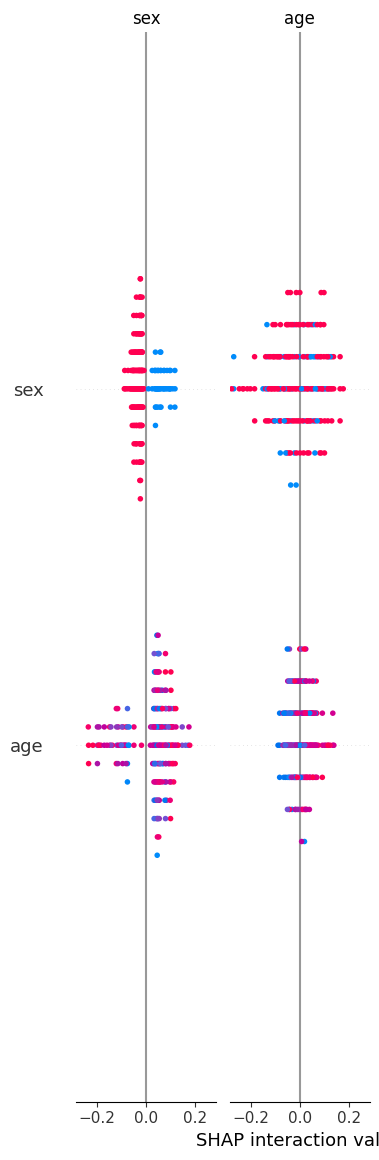

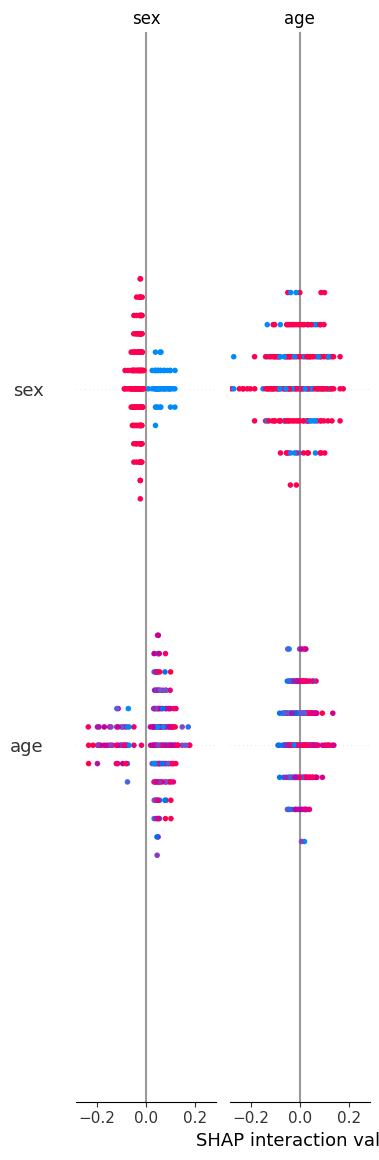

In [142]:
# 0) Real feature names from the dataset
FEATURE_NAMES = [
    "age","sex","cp","trestbps","chol","fbs","restecg",
    "thalach","exang","oldpeak","slope","ca","thal"
]

# 1) If X_train/X_test are ndarrays, wrap them with the proper names (order is preserved)
import pandas as pd
if not isinstance(X_train, pd.DataFrame):
    X_train = pd.DataFrame(X_train, columns=FEATURE_NAMES)
if not isinstance(X_test, pd.DataFrame):
    X_test  = pd.DataFrame(X_test,  columns=FEATURE_NAMES)

# 2) Refit the model on the DataFrame (optional but keeps everything consistent)
model.fit(X_train, Y_train)

# 3) SHAP with proper labels
import shap
shap.initjs()
explainer = shap.TreeExplainer(model)

# sample for speed (optional)
Xs = X_test.sample(n=min(200, len(X_test)), random_state=42)

# New API first, fall back to legacy
try:
    sv = explainer(Xs)
    # sv already carries feature names when Xs is a DataFrame
    shap.plots.beeswarm(sv, max_display=15)
    shap.plots.bar(sv, max_display=15)
except Exception:
    sv = explainer.shap_values(Xs.values)
    # binary: pick positive class
    if isinstance(sv, list) and len(sv) == 2:
        shap.summary_plot(sv[1], Xs, feature_names=FEATURE_NAMES, plot_type="dot", max_display=15)
        shap.summary_plot(sv[1], Xs, feature_names=FEATURE_NAMES, plot_type="bar", max_display=15)
    else:
        shap.summary_plot(sv, Xs, feature_names=FEATURE_NAMES, plot_type="dot", max_display=15)
        shap.summary_plot(sv, Xs, feature_names=FEATURE_NAMES, plot_type="bar", max_display=15)


In [143]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# === 1. Load your dataset ===
df = pd.read_csv("heart.csv")

FEATURES = [
    "age","sex","cp","trestbps","chol","fbs","restecg",
    "thalach","exang","oldpeak","slope","ca","thal"
]

X = df[FEATURES]
y = df["target"].astype(int)

# === 2. Train/test split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === 3. Build pipeline ===
model = Pipeline([
    ("scale", StandardScaler()),
    ("rf", RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        min_samples_split=2,
        random_state=42
    ))
])

model.fit(X_train, y_train)

# === 4. Save model + feature names + test data (for SHAP plots) ===
joblib.dump(model, "heart_model.pkl")
joblib.dump(FEATURES, "feature_names.pkl")
X_test.to_csv("X_test_sample.csv", index=False)

print("✅ Model saved to heart_model.pkl, features saved to feature_names.pkl")


✅ Model saved to heart_model.pkl, features saved to feature_names.pkl
